## CASE 1: BACKPROPAGATION NEURAL NETWORK 
Nama: Aurellia Vieryn <br>
NIM : 2440066626 <br>
Dataset 1: https://www.kaggle.com/datasets/adhurimquku/ford-car-price-prediction <br>
Link Video:
#### Import Our Dataset

In [ ]:
from google.colab import files
 
uploaded = files.upload()

In [ ]:
import pandas as pd
ford = pd.read_csv("ford.csv")
ford.head(5)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


Our dataset has been successfully imported with the file name "ford.csv". The next thing we want to do is pre-processing the data as mentioned in the test paper too.

a. Pre-process the dataset you have, determine what problems the dataset is facing, and identify
the solutions needed to overcome these problems. (10 points)

#### Preprocessing Data

Let's first explore the dataset.

In [ ]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [ ]:
import numpy as np
np.shape(ford)

(17966, 9)

The results tells us that there is 17966 rows, along with 9 columns in the dataset. The information also tells us that each row doesn't have a missing value, this means that we don't need to deal with missing values in the future.<br>

We will go straight to data transformation by encoding our categorical variables, and then normalize our continous variables.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
model_enc = pd.get_dummies(ford.model, prefix = 'model')
model_df = pd.DataFrame(model_enc)
model_df.head(5)

,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,model_ Escort,model_ Fiesta,model_ Focus,model_ Fusion,model_ Galaxy,model_ Grand C-MAX,...,model_ Mondeo,model_ Mustang,model_ Puma,model_ Ranger,model_ S-MAX,model_ Streetka,model_ Tourneo Connect,model_ Tourneo Custom,model_ Transit Tourneo,model_Focus
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
transmission_enc = pd.get_dummies(ford.transmission, prefix = 'trs')
transmission_df = pd.DataFrame(transmission_enc)
transmission_df.head(5)

,trs_Automatic,trs_Manual,trs_Semi-Auto
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0


In [ ]:
ft_enc = pd.get_dummies(ford.fuelType, prefix = 'fueltype')
ft_df = pd.DataFrame(ft_enc)
ft_df.head(5)

,fueltype_Diesel,fueltype_Electric,fueltype_Hybrid,fueltype_Other,fueltype_Petrol
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


Since we have made the dataframes for the dummies of each categorical variable, we need to drop the original columns and then join the dataframe together to make the new `ford` dataframe.

In [ ]:
ford = ford.drop(columns=['model', 'transmission', 'fuelType'])

In [ ]:
ford = pd.concat([ford,model_df],axis=1)
ford = pd.concat([ford,transmission_df],axis=1)
ford = pd.concat([ford,ft_df],axis=1)

In [ ]:
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          17966 non-null  int64  
 1   price                         17966 non-null  int64  
 2   mileage                       17966 non-null  int64  
 3   tax                           17966 non-null  int64  
 4   mpg                           17966 non-null  float64
 5   engineSize                    17966 non-null  float64
 6   model_ B-MAX                  17966 non-null  uint8  
 7   model_ C-MAX                  17966 non-null  uint8  
 8   model_ EcoSport               17966 non-null  uint8  
 9   model_ Edge                   17966 non-null  uint8  
 10  model_ Escort                 17966 non-null  uint8  
 11  model_ Fiesta                 17966 non-null  uint8  
 12  model_ Focus                  17966 non-null  uint8  
 13  m

In [ ]:
ford['year'] = ford['year'] / ford['year'].max(axis=0)
ford['mileage'] = ford['mileage'] / ford['mileage'].max(axis=0)
ford['tax'] = ford['tax'] / ford['tax'].max(axis=0)
ford['mpg'] = ford['mpg'] / ford['mpg'].max(axis=0)
ford['engineSize'] = ford['engineSize'] / ford['engineSize'].max(axis=0)
ford['price'] = ford['price'] / ford['price'].max(axis=0)

ford.head()

,year,price,mileage,tax,mpg,engineSize,model_ B-MAX,model_ C-MAX,model_ EcoSport,model_ Edge,...,model_ Transit Tourneo,model_Focus,trs_Automatic,trs_Manual,trs_Semi-Auto,fueltype_Diesel,fueltype_Electric,fueltype_Hybrid,fueltype_Other,fueltype_Petrol
0,0.979126,0.218202,0.089753,0.258621,0.285927,0.2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.979612,0.254569,0.051130,0.258621,0.285927,0.2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.979126,0.236385,0.070118,0.258621,0.285927,0.2,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.980097,0.318211,0.058882,0.250000,0.199703,0.3,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.980097,0.300027,0.008343,0.250000,0.241328,0.2,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1



#### Splitting Dataset

We have transformed our data and our dataset doesn't seem to have a problem as what we have seen from the preprocessing so far. So, we can now make out training, testing and validation dataset with a ratio of 80% train, 10% test, and 10% validation. Also, a reminder that our target variable here is the price of the Ford Car, so the column `price`.

Separate your dataset into train, test, and validation, according to the following ratio: 80% train,
10% test, and 10% validation. (5 points) <br>

Before splitting, we want to scale our data first.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X = ford.drop(columns = ['price'])
y = ford['price']

X = scaler_X.fit_transform(X)
y = scaler_y.fit_transform(np.expand_dims(y,axis=1))

y = y.reshape(17966,1)

X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8, random_state=9)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=9)

print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)
print(X_test.shape)
print(y_test.shape)

(14372, 37)
(14372, 1)
(1797, 37)
(1797, 1)
(1797, 37)
(1797, 1)


#### Creating the BackPropagation Neural Network Model

Create a Backpropagation Neural Network model as a baseline with the following conditions: n-nodes input layer, 1 hidden layer with 2 × n initial nodes, and a final layer of k classes. (5 points)

We will use the library PyTorch and define some classes.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [ ]:
from torch.utils.data import Dataset
#Buat class dataset sendiri
class AutosDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __getitem__(self, index):
    X = torch.Tensor(self.X[index])
    y = torch.Tensor(self.y[index])
    
    return X, y

  def __len__(self):
    return len(self.X)

In [ ]:
from torch.utils.data import DataLoader

train_ds = AutosDataset(X_train, y_train)
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True, num_workers=0)

valid_ds = AutosDataset(X_valid, y_valid)
valid_loader = DataLoader(valid_ds, batch_size=16, shuffle=False, num_workers=0)

test_ds = AutosDataset(X_test, y_test)
test_loader = DataLoader(test_ds, batch_size=16, shuffle=False, num_workers=0)

Here, we use the input layer as the amount of the X variables, which is 37 columns (dummies included). The hidden layer will be twice as much neurons as the input, so it is 74 neurons. The output layer, of course, will have one target variable.

In [ ]:
class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        #Input Layer
        self.fc1 = nn.Linear(37, 74) #in_feature, out_feature 
        self.bn1 = nn.BatchNorm1d(74)
        #Hidden Layer
        self.fc2 = nn.Linear(74,74) #hidden layer 1
        self.bn2 = nn.BatchNorm1d(74)
        #output layer
        self.fc3 = nn.Linear(74, 1)

    def forward(self, X):
        X = self.fc1(X)
        X = F.relu(X)
        X = self.bn1(X)
        X = self.fc2(X)
        X = F.relu(X)
        X = self.bn2(X)
        X = self.fc3(X)

        return X

Next, we define net as the class `Net()`, and creating new criterion for measuring the mean squared error using `nn.MSELoss()`. We will use learning rate = 0.01 for the optimizer. 

In [ ]:
net = Net()

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

In [ ]:
epochs = 300
 
train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):    
    train_losses = []
    valid_losses = []
    
    print("==============================================================")
    print("Epoch {}".format(i))
    
    for iteration, batch_data in enumerate(train_loader):
        X_batch, y_batch = batch_data
        
        optimizer.zero_grad()
        
        out = net(X_batch)
        loss = criterion(out, y_batch.squeeze())
        
        loss.backward()
        optimizer.step()
        
        # print(f'training iteration: {iteration:3} loss: {loss:10.8f}')
        train_losses.append(loss)
    
    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))
    
    train_mean_losses.append(train_mean_loss)
        
    with torch.set_grad_enabled(False):
        for iteration, batch_data in enumerate(valid_loader):
            X_batch, y_batch = batch_data

            out = net(X_batch)
            loss = criterion(out, y_batch.squeeze())
            valid_losses.append(loss)
            
        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))
        
        valid_mean_losses.append(valid_mean_loss)
        
        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net.state_dict(), "best_model.pth")

Epoch 0


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target

training loss: 1.00841641
validation loss: 1.00735831
Epoch 1
training loss: 0.99807853
validation loss: 1.00500989
Epoch 2
training loss: 0.99775016
validation loss: 1.00495601
Epoch 3
training loss: 0.99795920
validation loss: 1.00543940
Epoch 4
training loss: 0.99768174
validation loss: 1.00517952
Epoch 5
training loss: 0.99769300
validation loss: 1.00502884
Epoch 6
training loss: 0.99816805
validation loss: 1.00517917
Epoch 7
training loss: 0.99754351
validation loss: 1.00624943
Epoch 8
training loss: 0.99731112
validation loss: 1.00820947
Epoch 9
training loss: 0.99765170
validation loss: 1.00515556
Epoch 10
training loss: 0.99742919
validation loss: 1.00693798
Epoch 11
training loss: 0.99896598
validation loss: 1.00510895
Epoch 12
training loss: 0.99695474
validation loss: 1.01178205
Epoch 13
training loss: 0.99805170
validation loss: 1.00495934
Epoch 14
training loss: 0.99822122
validation loss: 1.00880718
Epoch 15
training loss: 0.99865472
validation loss: 1.00495625
Epoch 16
t

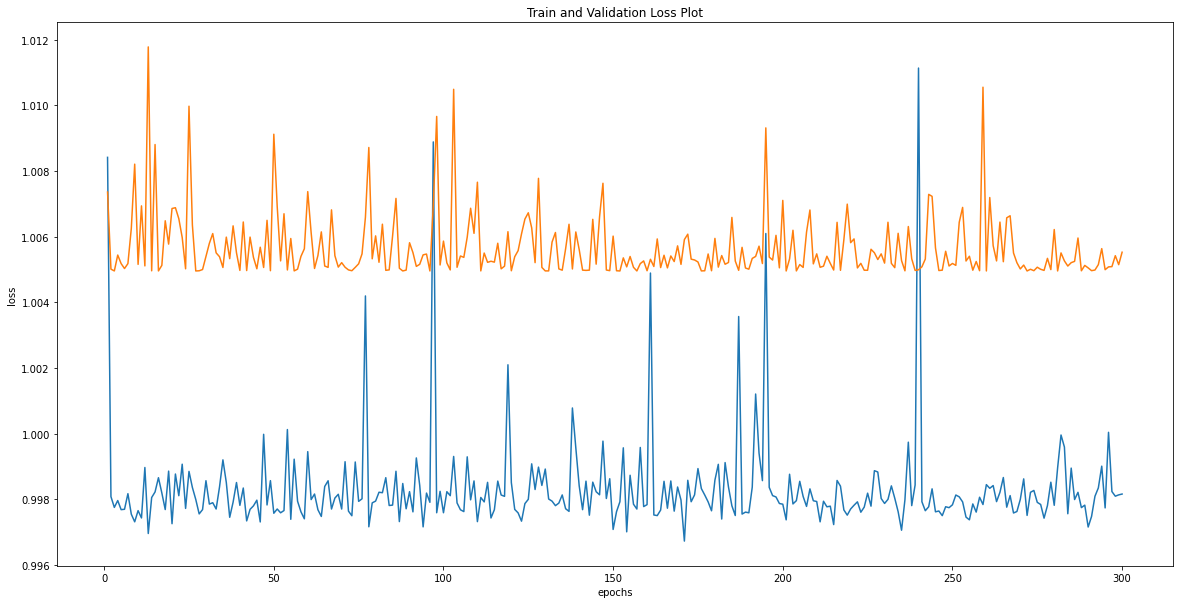

240 tensor(1.0111, grad_fn=<MeanBackward0>)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tm_loss = [tml.item() for tml in train_mean_losses]
plt.plot(range(1,epochs+1), tm_loss)
vm_loss = [vml.item() for vml in valid_mean_losses]
plt.plot(range(1,epochs+1), vm_loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Train and Validation Loss Plot')
plt.show()
max_y = max(train_mean_losses)
max_x = range(1,epochs+1)[train_mean_losses.index(max_y)]
print(max_x, max_y)

From the plot, we can tell that mostly the validation loss is higher than the training loss, but not too high. This means that our dataset is not overfitting or underfitting.

In [ ]:
net.load_state_dict(torch.load("best_model.pth"))

<All keys matched successfully>

In [ ]:
from sklearn.metrics import mean_squared_error
test_pred = np.empty((0,1))
with torch.no_grad():
    for iteration, batch_data in enumerate(test_loader):
        X_batch, y_batch = batch_data        
        out = net(X_batch)
        
        test_pred = np.append(test_pred, out.numpy(), axis=0)
        
test_pred = np.array(test_pred)
test_pred = scaler_y.inverse_transform(test_pred)

test_gt = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(test_gt, test_pred)
print(mse)

0.007513162005260902


In [ ]:
from sklearn.metrics import r2_score
r2_score(test_gt, test_pred)

-0.0001255711435210749

Our model returns a MSE of 0.007513 and the r2 score is -0.00011. Actually, the r2 score is kind of not usual since r2 is usually placed in a range of 0 to 1. But we will just interpret this as the chosen model fits worse than a horizontal line.

#### Hyperparameter Tuning or Architectural Modification

Create hyperparameter tuning or architectural modifications from the baseline made in number 1c. Justify why you added the architecture or performed the hyperparameter tuning process with the selected method. (15 points)

In this section, we would like to improve our model by hyperparameter tuning or architectural modification.

In [ ]:
from skorch import NeuralNetRegressor
nets = NeuralNetRegressor(Net
                         , max_epochs=300
                         , lr=0.001
                         , verbose=1)

In [ ]:
trainx = X_train.astype(np.float32)
trainy = y_train.astype(np.float32)

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'lr': [0.005, 0.01, 0.05],
    'max_epochs': [100,200,300]
}

gs = GridSearchCV(nets, params, refit=False, scoring='r2', verbose=1, cv=2, error_score='raise')
grid_result = gs.fit(trainx, trainy)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
  epoch    train_loss    valid_loss     dur
-------  ------------  ------------  ------
      1        0.4588        0.3312  0.1108
      2        0.1968        0.2197  0.1137
      3        0.1651        0.1855  0.1128
      4        0.1498        0.1671  0.1121
      5        0.1398        0.1551  0.1181
      6        0.1324        0.1490  0.1135
      7        0.1267        0.1426  0.1169
      8        0.1222        0.1395  0.1158
      9        0.1183        0.1358  0.1312
     10        0.1151        0.1340  0.1148
     11        0.1123        0.1323  0.1151
     12        0.1098        0.1300  0.1152
     13        0.1075        0.1291  0.1122
     14        0.1055        0.1272  0.1167
     15        0.1037        0.1271  0.1130
     16        0.1020        0.1252  0.1237
     17        0.1005        0.1251  0.1208
     18        0.0991        0.1238  0.1692
     19        0.0979        0.1240  0.1189
     20        0

In [ ]:
gs.cv_results_

{'mean_fit_time': array([11.9622004 , 24.57255912, 37.5139215 , 12.07324314, 25.2138052 ,
        36.77389181, 12.87113702, 24.9851408 , 37.96036506]),
 'std_fit_time': array([0.01058102, 0.81737113, 0.07561159, 0.119807  , 0.11832285,
        0.89511526, 0.58881676, 0.96037841, 1.74890232]),
 'mean_score_time': array([0.09099722, 0.08490741, 0.08594465, 0.10801125, 0.11323678,
        0.09472501, 0.1154114 , 0.08661902, 0.08874893]),
 'std_score_time': array([0.00202799, 0.00278461, 0.00075865, 0.01962185, 0.02701962,
        0.00167739, 0.01892674, 0.00348961, 0.00084782]),
 'param_lr': masked_array(data=[0.005, 0.005, 0.005, 0.01, 0.01, 0.01, 0.05, 0.05,
                    0.05],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_max_epochs': masked_array(data=[100, 200, 300, 100, 200, 300, 100, 200, 300],
              mask=[False, False, False, False, False, False, Fal

From the result of hyper parameter tuning, it is written that the rank of the test score is [2, 3, 4, 1, 8, 9, 5, 6, 7] respectively. So, we will use the 2nd array, which is lr = 0.005 and max_epochs = 200. Also, it is not recommended to run the hyperparameter tuning again since it took a long time. <br>

The next step is to apply these 'best' parameters.

In [ ]:
net = Net()

criterion = nn.MSELoss()

optimizer = torch.optim.SGD(net.parameters(), lr=0.005)

In [ ]:
epochs = 200
 
train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):    
    train_losses = []
    valid_losses = []
    
    print("==============================================================")
    print("Epoch {}".format(i))
    
    for iteration, batch_data in enumerate(train_loader):
        X_batch, y_batch = batch_data
        
        optimizer.zero_grad()
        
        out = net(X_batch)
        loss = criterion(out, y_batch.squeeze())
        
        loss.backward()
        optimizer.step()
        
        # print(f'training iteration: {iteration:3} loss: {loss:10.8f}')
        train_losses.append(loss)
    
    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))
    
    train_mean_losses.append(train_mean_loss)
        
    with torch.set_grad_enabled(False):
        for iteration, batch_data in enumerate(valid_loader):
            X_batch, y_batch = batch_data

            out = net(X_batch)
            loss = criterion(out, y_batch.squeeze())
            valid_losses.append(loss)
            
        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))
        
        valid_mean_losses.append(valid_mean_loss)
        
        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net.state_dict(), "best_model.pth")

Epoch 0


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([4])) that is different to the input size (torch.Size([4, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.7/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target

training loss: 1.01591766
validation loss: 1.00868762
Epoch 1
training loss: 0.99929631
validation loss: 1.00581598
Epoch 2
training loss: 0.99798197
validation loss: 1.00539613
Epoch 3
training loss: 0.99780947
validation loss: 1.00724983
Epoch 4
training loss: 0.99755764
validation loss: 1.00517440
Epoch 5
training loss: 0.99774259
validation loss: 1.00586116
Epoch 6
training loss: 0.99748772
validation loss: 1.00495732
Epoch 7
training loss: 0.99772161
validation loss: 1.00523174
Epoch 8
training loss: 0.99769795
validation loss: 1.00499964
Epoch 9
training loss: 0.99788666
validation loss: 1.00496244
Epoch 10
training loss: 0.99727094
validation loss: 1.00510228
Epoch 11
training loss: 0.99757314
validation loss: 1.00506794
Epoch 12
training loss: 0.99714214
validation loss: 1.00500023
Epoch 13
training loss: 0.99731314
validation loss: 1.00497389
Epoch 14
training loss: 0.99990606
validation loss: 1.00674188
Epoch 15
training loss: 0.99797803
validation loss: 1.00553358
Epoch 16
t

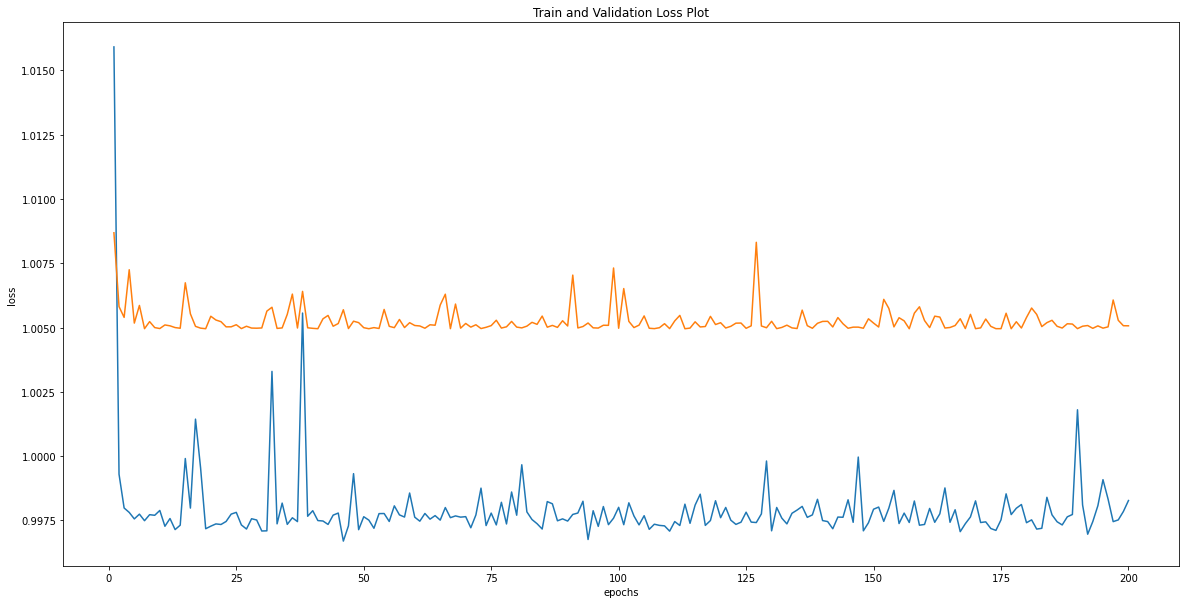

1 tensor(1.0159, grad_fn=<MeanBackward0>)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
tm_loss = [tml.item() for tml in train_mean_losses]
plt.plot(range(1,epochs+1), tm_loss)
vm_loss = [vml.item() for vml in valid_mean_losses]
plt.plot(range(1,epochs+1), vm_loss)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Train and Validation Loss Plot')
plt.show()
max_y = max(train_mean_losses)
max_x = range(1,epochs+1)[train_mean_losses.index(max_y)]
print(max_x, max_y)

In [ ]:
net.load_state_dict(torch.load("best_model.pth"))

<All keys matched successfully>

In [ ]:
from sklearn.metrics import mean_squared_error
test_pred = np.empty((0,1))
with torch.no_grad():
    for iteration, batch_data in enumerate(test_loader):
        X_batch, y_batch = batch_data        
        out = net(X_batch)
        test_pred = np.append(test_pred, out.numpy(), axis=0)
        
test_pred = np.array(test_pred)
test_pred = scaler_y.inverse_transform(test_pred)

test_gt = scaler_y.inverse_transform(y_test)

mse = mean_squared_error(test_gt, test_pred)
print(mse)

0.007512806752795733


In [ ]:
from sklearn.metrics import r2_score
r2_score(test_gt, test_pred)

-7.828119098451936e-05

I performed using GridSearchCV for hyperparameter tuning because that method is the method that I've used before. And from previous results, the result I got was good and simple, so I decided to use it again for this hyperparameter tuning case and it will make the model better of course. Also from why I chose epoch and learning rate because those two definitely will slightly change the results (learning rate = step size at each iteration, epoch = one cycle through training set).

#### Comparing the MSE and R2 results 

Evaluate the test set results for accuracy, precision, and recall. Compare the results using models from 1c and 1d on the test set. (5 points) <br>

In each part of 1c and 1d, we have already seen the output of the MSE and R2. It can't be said that the result is good, but after using hyperparameter tuning, the R2 result indeed got a little bit higher (from -0.0001255711435210749 to -7.828119098451936e-05). <br>

Also, the reason why the r2 value is negative is probably because the model fits worse than a horizontal line.
